Imagine these dataset represent the food consumption habits created by NEOM employees on an annual bases. Previously, employees ordered freely, which led to waste and increased costs. With the introduction of the dining wallet system, you now have a fixed amount of points (money) per week to use for food. The objective is to analyze this data and explore how the new system would impact food waste, food consumption and sustainability practices.

Below there are **three** sections each analysing a different data set. Go through each section and derive your insights.


*   Food Waste Dataset
*   Restaurant Consumption Dataset
*   Food Choices Dataset
<br /><br />

Feel free to add your own analysis and combine datasets to come up with insights about food consumption habits



---
---
#**Food Waste Dataset**



The **Food Waste UN EDA** dataset provides comprehensive information on food waste across various countries, focusing on household, retail, and food service sectors. Below is an overview and detailed description of the dataset:

## **Dataset Overview**

- **Description**: This dataset encompasses estimates of food waste at the household, retail, and food service levels for different countries, along with additional relevant data points.
- **Total Records**: 214 rows and 12 columns.
- **Source**: Kaggle

## **Column Descriptions**

1. **`Country`**: Name of the country.
2. **`combined figures (kg/capita/year)`**: Estimated amount of food waste generated per capita by households, Retail, and Food Services combined annually, measured in kilograms.
3. **`Household estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by households annually, measured in kilograms.
4. **`Household estimate (tonnes/year)`**: Estimated amount of food waste generated by households annually, measured in tonnes.
5. **`Retail estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by retail annually, measured in kilograms.
6. **`Retail estimate (tonnes/year)`**: Estimated amount of food waste generated by retial annually, measured in tonnes.
7. **`Food service estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by food service annually, measured in kilograms.
8. **`Food service estimate (tonnes/year)`**: Estimated amount of food waste generated by Food service annually, measured in tonnes.
9. **`Confidence in estimate`**: Categorization of the confidence level of the estimates assigned per country.
10. **`M49 code`**: United Nations M49 numerical code assigned to each country or area.
11. **`Region`**: Geographical region classification of the country.
12. **`Source`**: URL to the source of the estimates.


This dataset enables analysis of food waste patterns in relation to waste sources and regional differences.

---


## Import and Read the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import numpy as np
import pandas as pd
# Assuming kagglehub is installed, if not, uncomment the following line
# !pip install kagglehub
import kagglehub

In [ ]:
# **Food Waste Dataset**


# Download latest version
path = kagglehub.dataset_download("joebeachcapital/food-waste")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a CSV
            df = pd.read_csv(file_path)
            print("Successfully read the file as a CSV.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a CSV. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

100%|██████████| 6.99k/6.99k [00:00<00:00, 5.35MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/food-waste/versions/1
Successfully read the file as a CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    obje

## EDA - Explatotary Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [ ]:
df['Region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Eastern Europe', 'Northern America', 'South-eastern Asia',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Polynesia',
       'Micronesia', 'Central Asia'], dtype=object)

In [ ]:
df.sample(5)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
155,Republic of Korea,110,71,3657764,13,656263,26,1309852,Low Confidence,410,Eastern Asia,https://www.unep.org/resources/report/unep-foo...
108,Lesotho,144,100,211661,16,33240,28,58760,Very Low Confidence,426,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
127,Montenegro,127,83,51988,16,9822,28,17363,Very Low Confidence,499,Southern Europe,https://www.unep.org/resources/report/unep-foo...
198,Tuvalu,120,76,878,16,181,28,321,Very Low Confidence,798,Polynesia,https://www.unep.org/resources/report/unep-foo...
76,Gibraltar,123,84,2840,13,432,26,862,Low Confidence,292,Southern Europe,https://www.unep.org/resources/report/unep-foo...


In [ ]:
df[['combined figures (kg/capita/year)',
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].describe().apply(lambda x: ['{:.2f}'.format(i) for i in x])

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year)
count,214.00,214.00,214.00,214.00
mean,126.79,84.29,15.12,27.38
std,22.16,18.31,5.77,6.51
min,61.00,33.00,3.00,3.00
25%,115.00,74.00,13.00,26.00
50%,123.00,80.00,16.00,28.00
75%,137.75,95.00,16.00,28.00
max,260.00,189.00,79.00,90.00


##**Food Waste Per Capita**

###What is the ovreall Food Waste per capita distribution of all countries?

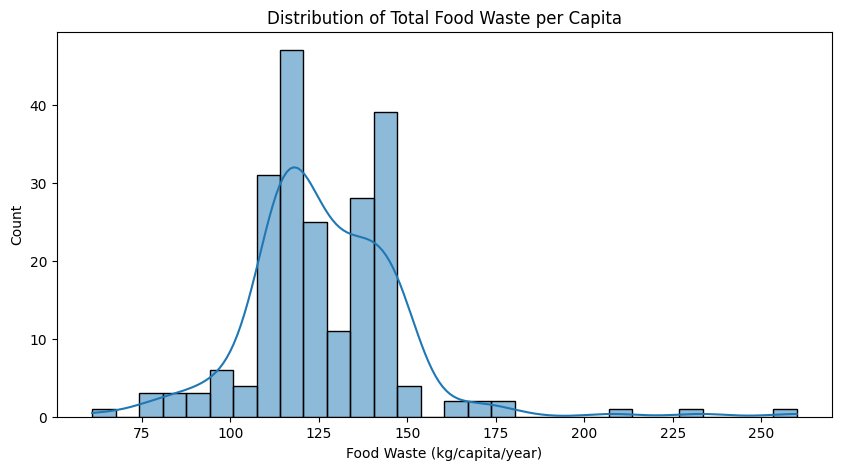

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["combined figures (kg/capita/year)"], bins=30, kde=True)
plt.title("Distribution of Total Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Count")
plt.show()

###Which countries have the highest food waste per capita?

<ipython-input-11-a65b3721a7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")


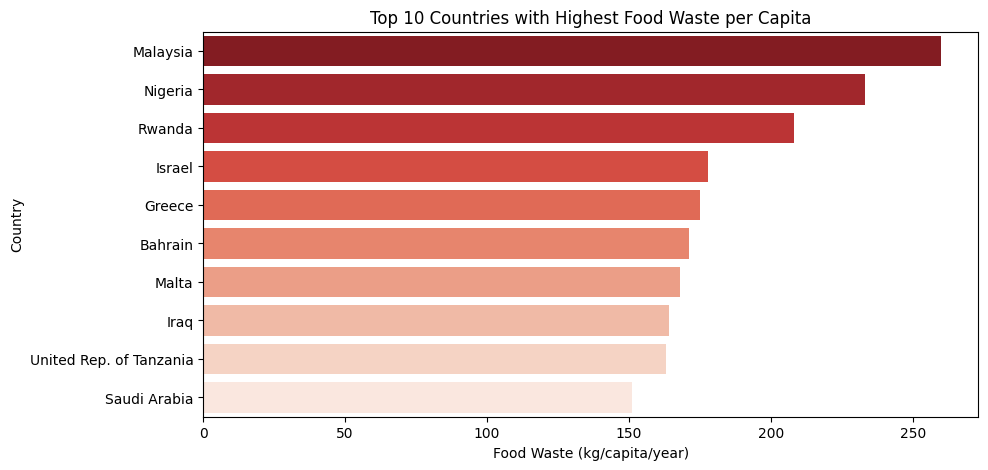

In [ ]:
top_countries = df.nlargest(10, "combined figures (kg/capita/year)")

plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")
plt.title("Top 10 Countries with Highest Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Country")
plt.show()

###What is the distribution of food waste among the different sectors?

<ipython-input-12-ab92fa4371c3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")


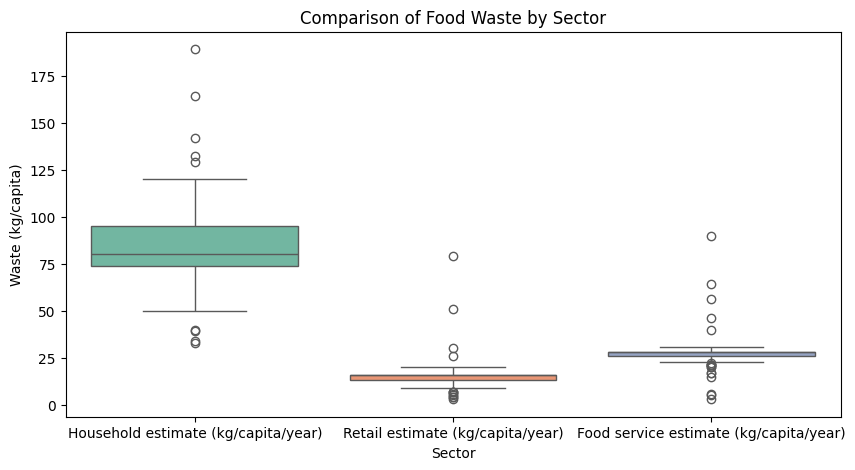

In [ ]:
plt.figure(figsize=(10, 5))

df_melted = df.melt(id_vars=["Country"],
                    value_vars=['Household estimate (kg/capita/year)',
                                'Retail estimate (kg/capita/year)',
                                'Food service estimate (kg/capita/year)'],
                    var_name="Sector", value_name="Waste (kg/capita)")

sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")
plt.title("Comparison of Food Waste by Sector")
# plt.xticks(rotation=15)
plt.show()

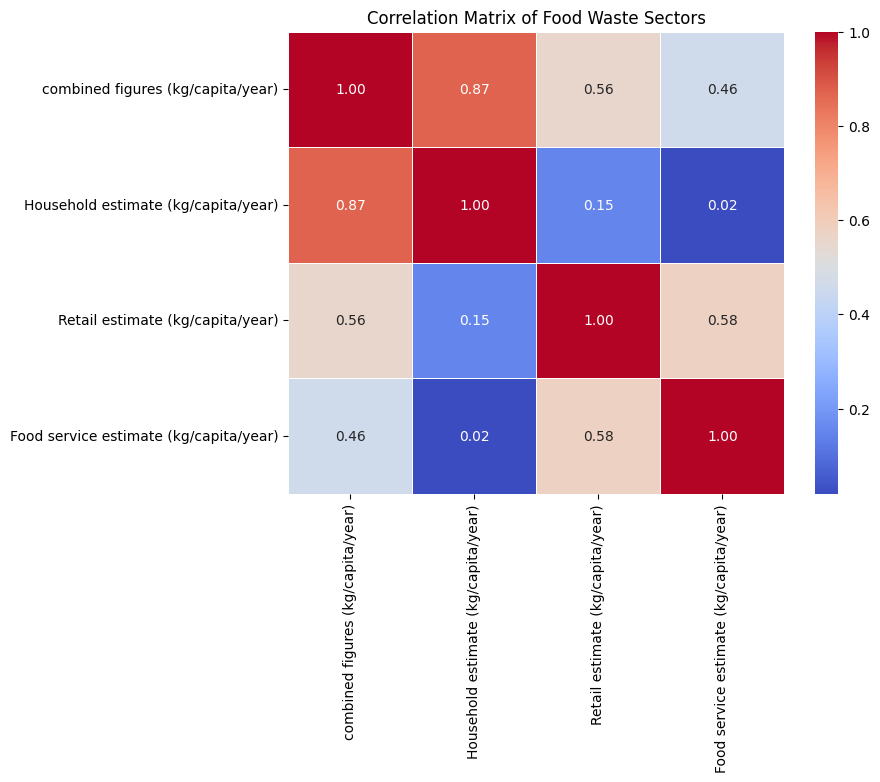

In [ ]:
sector_cols = [
    "combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)'
]

# Compute the correlation matrix
correlation_matrix = df[sector_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Food Waste Sectors")
plt.show()

###Which Regions have the highest food waste per capita?

<ipython-input-42-2a8c13becd69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="combined figures (kg/capita/year)", y="Region", palette="Reds_r")


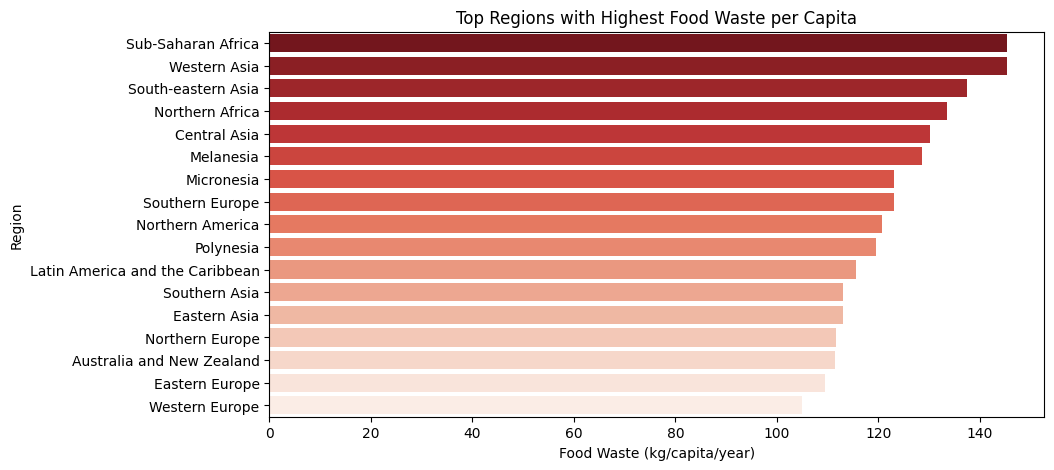

In [ ]:
top_regions = df.nlargest(20, "combined figures (kg/capita/year)")
top_regions = df.groupby('Region')['combined figures (kg/capita/year)'].mean().reset_index().sort_values(by='combined figures (kg/capita/year)', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_regions, x="combined figures (kg/capita/year)", y="Region", palette="Reds_r")
plt.title("Top Regions with Highest Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Region")
plt.show()

<ipython-input-31-2ee90b355adf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="combined figures (kg/capita/year)", palette="coolwarm")


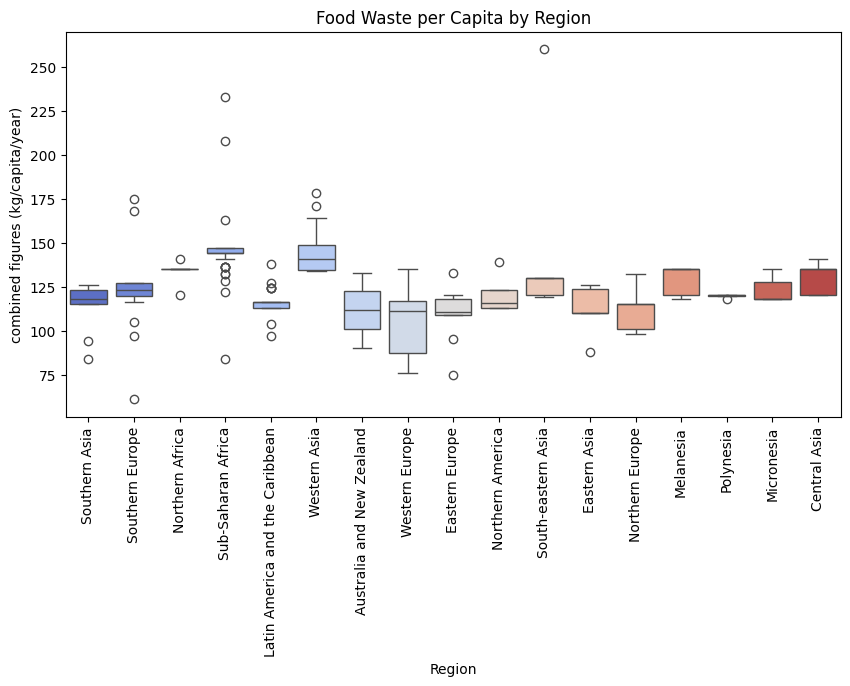

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Region", y="combined figures (kg/capita/year)", palette="coolwarm")
plt.title("Food Waste per Capita by Region")
plt.xticks(rotation=90)
plt.show()

## **Saudi Arabia Specific Analysis**


### Extract Data for Saudi Arabia

In [ ]:
# Filter data for Saudi Arabia
saudi_df = df[df["Country"] == "Saudi Arabia"]

# Display Saudi Arabia's food waste data
saudi_df

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
167,Saudi Arabia,151,105,3594080,20,673502,26,876260,High Confidence,682,Western Asia,https://www.unep.org/resources/report/unep-foo...


### Compare Saudi Arabia’s Food Waste with Global Averages

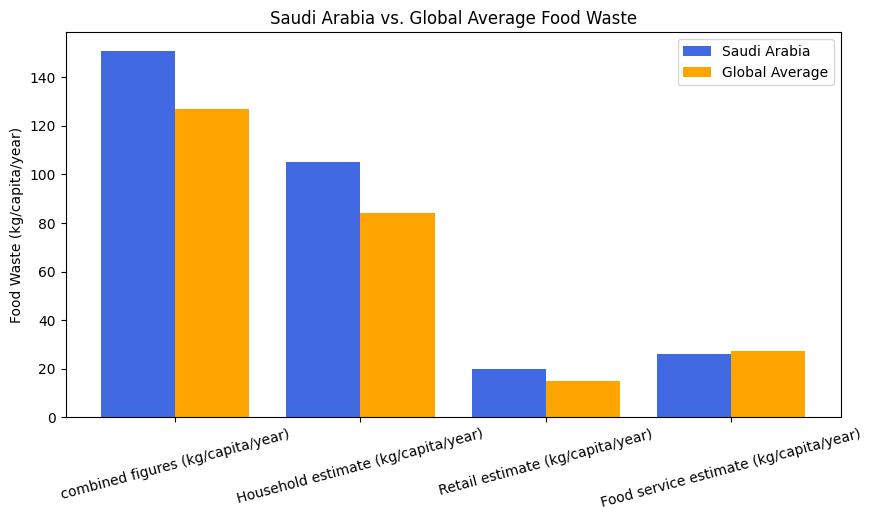

In [ ]:
# Compute global averages
global_avg = df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].mean()

# Extract Saudi Arabia’s values
saudi_values = saudi_df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].values.flatten()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({"Category": global_avg.index,
                              "Saudi Arabia": saudi_values,
                              "Global Average": global_avg.values})

# Comparison table
comparison_df

# Plot comparison of Saudi Arabia vs. Global Average
plt.figure(figsize=(10, 5))
bar_width = 0.4
indices = np.arange(len(comparison_df))

plt.bar(indices, comparison_df["Saudi Arabia"], width=bar_width, label="Saudi Arabia", color="royalblue")
plt.bar(indices + bar_width, comparison_df["Global Average"], width=bar_width, label="Global Average", color="orange")

plt.xticks(indices + bar_width / 2, comparison_df["Category"], rotation=15)
plt.ylabel("Food Waste (kg/capita/year)")
plt.title("Saudi Arabia vs. Global Average Food Waste")
plt.legend()
plt.show()

### Sectoral Contribution of Food Waste in Saudi Arabia

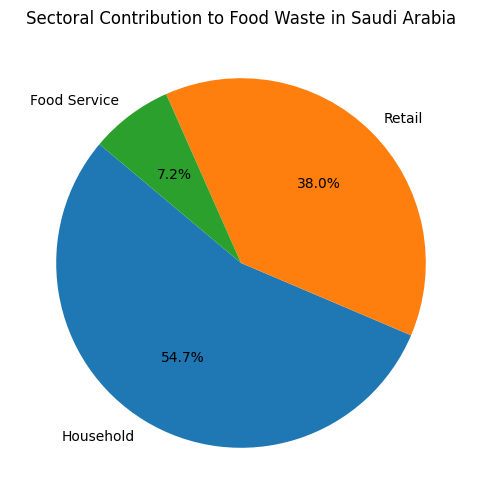

In [ ]:
# Pie chart of food waste distribution in Saudi Arabia
plt.figure(figsize=(8, 6))
sector_values = saudi_values[:-1]  # Exclude total waste
sector_labels = ["Household", "Retail", "Food Service"]

plt.pie(sector_values, labels=sector_labels, autopct="%1.1f%%", startangle=140)
plt.title("Sectoral Contribution to Food Waste in Saudi Arabia")
plt.show()

 Saudi Arabia’s Rank in Food Waste Per Capita

In [ ]:
# Rank Saudi Arabia in terms of Total Food Waste (kg/capita/year)
df_sorted = df.sort_values("combined figures (kg/capita/year)", ascending=False).reset_index(drop=True)
saudi_rank = df_sorted[df_sorted["Country"] == "Saudi Arabia"].index[0] + 1

print(f"Saudi Arabia ranks {saudi_rank} in Total Food Waste per Capita globally.")

Saudi Arabia ranks 10 in Total Food Waste per Capita globally.


You can download the notebook to do further analysis.

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/DataPuzzle_Dataset.ipynb

---
---
# **Restaurant Consumption Dataset**

## **Dataset Overview**

*  **`Dascription`**:
The Dataset provides detailed insights into dining patterns and item-level sales data, collected between January 1, 2019, at 11:30 AM to June 30, 2019, at 8:30 PM, covering a period of nearly six months.

*  **`Total Records`**: 9 columns and 18,100 rows.

*  **`Usecases`**: Menu planning and performance, Sales trends and pricing strategies, Customer segmentation and preferences, and Analyzing consumption patterns.

*  **`Source`**: Kaggle

## **Column Descriptions**

1. **`Date_time`**: Exact date and time of the order.  
2. **`Shift`**: Service period (e.g., Lunch, Dinner).  
3. **`Day Type`**: Type of day (Weekday, Weekend).  
4. **`Day`**: Calendar day of the month (e.g., Monday, Tuesday).
5. **`GatheringSize`**: Number of people in the dining group.  
6. **`MenuCategory`**: Broad menu category.  
7. **`MenuItem`**: Specific menu item ordered.  
8. **`ItemPrice`**: Price of the menu item.  
9. **`ItemQty`**: Quantity of the item ordered.  
10. **`hour`**: Hour of the order (24-hour format).   

---



## Import and Read the Data

In [ ]:
# **Restaurant Consumption Dataset**


# Download latest version
path = kagglehub.dataset_download("nilaydesmukh/restaurant-food-consumption")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a Excel
            df = pd.read_excel(file_path)
            print("Successfully read the file as a Excel.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a Excel. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

Path to dataset files: /root/.cache/kagglehub/datasets/nilaydesmukh/restaurant-food-consumption/versions/1
Successfully read the file as a CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_time     18100 non-null  datetime64[ns]
 1   Shift         18100 non-null  object        
 2   Day Type      18100 non-null  object        
 3   Day           18100 non-null  object        
 4   PartySize     18100 non-null  int64         
 5   MenuCateogry  18100 non-null  object        
 6   MenuItem      18100 non-null  object        
 7   ItemPrice     18100 non-null  float64       
 8   ItemQty       18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None


## EDA - Explatotary Data Analysis

In [ ]:
df.rename(columns={'PartySize': 'GatheringSize'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_time      18100 non-null  datetime64[ns]
 1   Shift          18100 non-null  object        
 2   Day Type       18100 non-null  object        
 3   Day            18100 non-null  object        
 4   GatheringSize  18100 non-null  int64         
 5   MenuCateogry   18100 non-null  object        
 6   MenuItem       18100 non-null  object        
 7   ItemPrice      18100 non-null  float64       
 8   ItemQty        18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


---
---
# **Food Choices Dataset**